In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
recipe = pd.read_csv('recipes.csv')
recipe

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.30
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,...,0.53,2.67,0.15,10.23,102.67,10.27,NaN,NaN,NaN,NaN
146,146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,...,0.21,1.07,0.03,1.68,19.82,1.98,2.48,13.76,10.69,3.56
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,4.77,23.83,0.45,29.70,141.16,14.12,NaN,NaN,NaN,NaN
148,148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,...,1.15,5.73,0.12,7.85,55.64,5.56,NaN,NaN,NaN,NaN


In [3]:
#Print the names of columns that have null values
recipe.columns[recipe.isna().any()].tolist()

['FiberAmount',
 'FiberpercentOfDailyNeed',
 'VitaminB6Amount',
 'VitaminB6percentOfDailyNeed',
 'ManganeseAmount',
 'ManganesepercentOfDailyNeed',
 'SeleniumAmount',
 'SeleniumpercentOfDailyNeed',
 'PotassiumAmount',
 'PotassiumpercentOfDailyNeed',
 'VitaminB2Amount',
 'VitaminB2percentOfDailyNeed',
 'VitaminCAmount',
 'VitaminCpercentOfDailyNeed',
 'PhosphorusAmount',
 'PhosphoruspercentOfDailyNeed',
 'FolateAmount',
 'FolatepercentOfDailyNeed',
 'VitaminB5Amount',
 'VitaminB5percentOfDailyNeed',
 'MagnesiumAmount',
 'MagnesiumpercentOfDailyNeed',
 'IronAmount',
 'IronpercentOfDailyNeed',
 'VitaminKAmount',
 'VitaminKpercentOfDailyNeed',
 'CopperAmount',
 'CopperpercentOfDailyNeed',
 'VitaminAAmount',
 'VitaminApercentOfDailyNeed',
 'VitaminB12Amount',
 'VitaminB12percentOfDailyNeed',
 'VitaminDAmount',
 'VitaminDpercentOfDailyNeed',
 'ZincAmount',
 'ZincpercentOfDailyNeed',
 'VitaminEAmount',
 'VitaminEpercentOfDailyNeed',
 'VitaminB3Amount',
 'VitaminB3percentOfDailyNeed',
 'Vitami

In [4]:
#2.Print the recipes with the highest number of aggregateLikes
recipe[recipe['aggregateLikes']==recipe['aggregateLikes'].max()]

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
50,50,False,True,True,False,4.0,16911,715419,Slow Cooker Spicy Hot Wings,101.43,...,7.42,37.09,0.08,5.0,44.21,4.42,NaN,NaN,NaN,NaN


In [5]:
#3. Handle the missing values of “calcium percent of Daily need”. Sort the resulting DataFrame by id column.
recipe['CalciumpercentOfDailyNeed'].isna().sum()

8

In [7]:
# calculate mean
meanCalPercent = recipe['CalciumpercentOfDailyNeed'].mean()
meanCalPercent


12.256690140845066

In [11]:
recipe['CalciumpercentOfDailyNeed']=recipe['CalciumpercentOfDailyNeed'].fillna(meanCalPercent)
recipe


,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81000,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,12.25669,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08000,0.28,1.53,9.89,3.30
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68000,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,...,0.53,2.67,0.15,10.23,102.67,10.27000,NaN,NaN,NaN,NaN
146,146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,...,0.21,1.07,0.03,1.68,19.82,1.98000,2.48,13.76,10.69,3.56
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,4.77,23.83,0.45,29.70,141.16,14.12000,NaN,NaN,NaN,NaN
148,148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,...,1.15,5.73,0.12,7.85,55.64,5.56000,NaN,NaN,NaN,NaN


In [12]:
recipe['CalciumpercentOfDailyNeed'].isna().sum()

0

In [14]:
recipe1 = recipe.sort_values(by=['id'])
recipe1


,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22,NaN,NaN


#4. Delete the columns that have count of null values == 141
(recipe1.isnull().sum()==141).sum()

In [15]:
#4.Count the number of columns with null values === 141
(recipe1.isnull().sum()==141).sum()

2

In [16]:
#Drop the 141 value column from the dataframe
(recipe1.loc[:,~(recipe1==141).any()])

,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,readyInMinutes,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,328,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,40,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,45,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,45,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,45,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,35,...,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN,NaN,NaN
30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,30,...,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN,NaN,NaN
118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,45,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN
39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,5,...,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22,NaN,NaN


In [17]:
#5. Print the title of the recipes that are vegetarian == TRUE and glutenFree == True¶
recipe1[(recipe1['vegetarian'] == True ) & (recipe1['glutenFree'] == True)].title.tolist()

['Banana Blueberry Pancakes',
 'Basil and Orange Confit Compound Butter',
 'Beet Slaw',
 'Blender Carrot Soup',
 'Blueberry Mojito Popsicles',
 'Breakfast Porridge',
 'Butternut Squash Soup',
 'Cauliflower Chickpea Stew',
 'Cherries and Yogurt Parfait',
 'Dandelion pesto',
 'Detox Orange Carrot Juice',
 'Easy Eggplant Parmesan',
 'EASY, CUMIN-LENTIL SPREAD',
 'Fire Roasted Tomato Chutney',
 'Fried Brown Rice',
 'Green Beans with Garlic Chips',
 'Indian-Style Dill and Turmeric Potato Salad',
 'Japanese Cucumber Salad',
 'Kappa Maki',
 'Layered Greek Salad',
 'Luscious Palak Paneer',
 'Mango Cranberry Sherbet',
 'Nutty Rice',
 'Peach Coconut Ice Cream',
 'Peanut Butter Cookies with Flax Seeds and Chocolate',
 'Roasted Asparagus with Egg Salad',
 'Roasted Strawberry Coconut Milk Ice Cream',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Seasonal Autumn Stew',
 'Spicy Carrot Amaranth Soup',
 'Stir Fried Cabbage and Tomatoes',
 

In [18]:
#6. How many vegan recipes are there (Vegan = Vegetarian and dairy free)?
len(recipe1[(recipe1['vegetarian'] == True) & (recipe1['dairyFree'] == True) ].title.tolist())

29

In [19]:
#7. Compare the average amount of Vitamin B12 for the vegan and non-vegan recipes. 
recipe1[recipe1['vegetarian'] == True]['VitaminB12Amount'].mean()

0.48357142857142865

In [20]:
# average of B12 for non-vagan
recipe1[recipe1['vegetarian'] == False]['VitaminB12Amount'].mean()

1.2353846153846157

In [21]:
#8.Compare the average health Score for both types of recipes (vegan vs non-vegan).
recipe1[recipe1['vegetarian'] == True]['healthScore'].mean()

18.484848484848484

In [22]:
recipe1[recipe1['vegetarian'] == False]['healthScore'].mean()

22.107142857142858

In [23]:
# vegan has less health score
#9.Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, but only if they already cost more than 100.
recipe1['VeganWeek']=recipe1[(recipe1['pricePerServing'] > 100) & (recipe1['vegetarian'] == True)]['pricePerServing']*0.9

In [24]:
recipe1[['title','pricePerServing','VeganWeek','vegetarian']]

,title,pricePerServing,VeganWeek,vegetarian
83,Oeufs En Meurette,209.85,NaN,False
43,Tortilla Burger Loco Vaca,407.86,NaN,False
104,"Bad Boy"" Giant Double Chocolate Cookies",44.08,NaN,False
95,Allergy-Free Stuffed Portobello Mushrooms,138.47,NaN,False
52,Almond Butter and Chocolate Squares,92.26,NaN,False
...,...,...,...,...
134,Garlic-Roasted Brussels Sprouts Side Dish,170.34,153.306,True
30,Vegan Chana Masala Curry,165.89,149.301,True
118,Potato & Leek Soup with Roasted Beets,244.08,NaN,False
39,Three Ingredient Frozen Pina Colada,214.60,193.140,True


In [25]:
#10.Among the non-vegan recipes, find the one requiring most time to prepare. How is it called?
recipe1[(recipe1['readyInMinutes']==recipe1['readyInMinutes'].max())&(recipe1['vegetarian'] == False)][['title','readyInMinutes','vegetarian','pricePerServing']]

,title,readyInMinutes,vegetarian,pricePerServing
83,Oeufs En Meurette,328,False,209.85


In [32]:
#11.Build a model using linear regression on this dataset
dataSet = recipe1[['pricePerServing','CaloriesAmount']]
dataSet


,pricePerServing,CaloriesAmount
83,209.85,251.21
43,407.86,1114.97
104,44.08,358.82
95,138.47,87.75
52,92.26,359.16
...,...,...
134,170.34,265.27
30,165.89,482.98
118,244.08,150.35
39,214.60,320.34


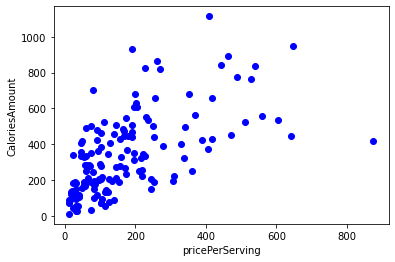

In [33]:
plt.scatter(dataSet['pricePerServing'] , dataSet['CaloriesAmount'] , color='blue')
plt.xlabel('pricePerServing')
plt.ylabel('CaloriesAmount')
plt.show()

In [35]:
train = dataSet[:(int((len(dataSet)*0.8)))]
test = dataSet[(int((len(dataSet)*0.8))):]


In [36]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['healthScore']])
train_y = np.array(train[['pricePerServing']])
regr.fit(train_x,train_y)


KeyError: "None of [Index(['healthScore'], dtype='object')] are in the [columns]"

In [37]:
LinearRegression()

NameError: name 'LinearRegression' is not defined